In [7]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as pl
import numpy as np
from numpy import array
import pandas as pd
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

%matplotlib inline
print(pd.__version__) # version 0.23.4
print(sk.__version__) # version 0.20.1

0.23.4
0.20.1


In [8]:
df = pd.read_csv('data/data_nasc.csv')
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,ANO,MES,ORIGEM,DESTINO,PASSAGEIROS
0,2013,12,NORTE,SUL,0.0
1,2014,1,NORTE,CENTRO-OESTE,115564.0
2,2003,1,NORTE,CENTRO-OESTE,26860.0
3,2012,4,SUDESTE,NORDESTE,655959.0
4,2004,7,NORTE,SUDESTE,17782.0


#### Dados estatísticos

In [9]:
df.describe()

,ANO,MES,PASSAGEIROS
count,5400.000000,5400.000000,5.400000e+03
mean,2008.500000,6.500000,1.962700e+05
std,5.188608,3.452372,2.932211e+05
min,2000.000000,1.000000,0.000000e+00
25%,2004.000000,3.750000,1.549925e+04
50%,2008.500000,6.500000,8.336150e+04
75%,2013.000000,9.250000,2.235170e+05
max,2017.000000,12.000000,1.982690e+06


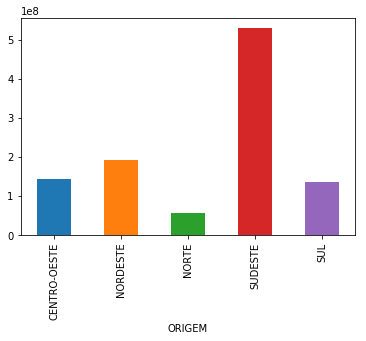

In [10]:
df.groupby(['ORIGEM'])['PASSAGEIROS'].sum().plot(kind='bar')

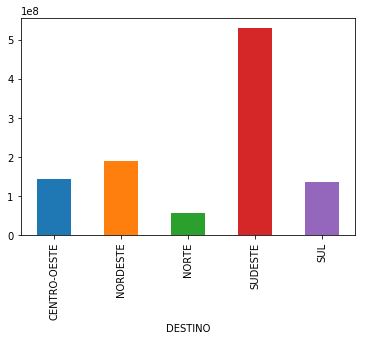

In [11]:
df.groupby(['DESTINO'])['PASSAGEIROS'].sum().plot(kind='bar')

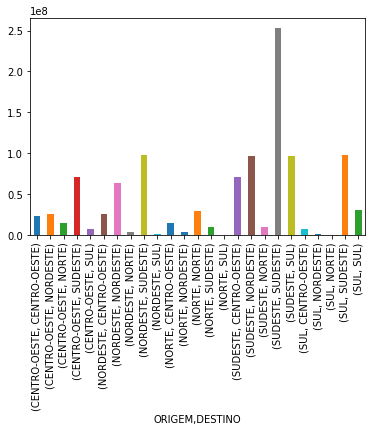

In [12]:
df.groupby(['ORIGEM', 'DESTINO'])['PASSAGEIROS'].sum().plot(kind='bar')

#### Gerando Dummies
Convertendo as colunas de texto em representação numérica

In [13]:
df_transformed = pd.get_dummies(df)
df_transformed.head()

,ANO,MES,PASSAGEIROS,ORIGEM_CENTRO-OESTE,ORIGEM_NORDESTE,ORIGEM_NORTE,ORIGEM_SUDESTE,ORIGEM_SUL,DESTINO_CENTRO-OESTE,DESTINO_NORDESTE,DESTINO_NORTE,DESTINO_SUDESTE,DESTINO_SUL
0,2013,12,0.0,0,0,1,0,0,0,0,0,0,1
1,2014,1,115564.0,0,0,1,0,0,1,0,0,0,0
2,2003,1,26860.0,0,0,1,0,0,1,0,0,0,0
3,2012,4,655959.0,0,0,0,1,0,0,1,0,0,0
4,2004,7,17782.0,0,0,1,0,0,0,0,0,1,0


#### Dividindo a massa de teste e realizando a normalização

In [9]:
X = df_transformed.drop(columns=['PASSAGEIROS'])
y = df_transformed['PASSAGEIROS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

processor = MinMaxScaler()
X_train_scaled = processor.fit_transform(X_train)
X_test_scaled = processor.transform(X_test)

#### Treinar Regressão

In [10]:
from regression import Regression

regression = Regression()
regression.estimate(X_train_scaled, X_test_scaled, y_train, y_test)

print("score {}".format(regression.best_score))

score 0.5986541525684851


#### Treinar Suport Vector Regression

In [11]:
from sgd_regression import SGDRegression

sgd_regression = SGDRegression()
sgd_regression.estimate(X_train_scaled, X_test_scaled, y_train, y_test)

print("score {}".format(sgd_regression.best_score))

score -0.14221286141007883


#### Treinar Linear Support Vector Regression

In [12]:
from linear_svr_regression import LinearSVRRegression

linear_svr = LinearSVRRegression()
linear_svr.estimate(X_train_scaled, X_test_scaled, y_train, y_test)

print("score {}".format(linear_svr.best_score))

score -0.42544803867845205


#### Estimativa Regressão

In [15]:
display(df[(df['ANO'] == 2017) & (df['MES'] == 1) & (df['ORIGEM'] == 'SUDESTE') & (df['DESTINO'] == 'SUL')])
estimativa = array([[2017, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]])

,ANO,MES,ORIGEM,DESTINO,PASSAGEIROS
4729,2017,1,SUDESTE,SUL,783373.0


In [16]:
estimativa_t = processor.transform(estimativa)

In [17]:
display(regression.best_clt.predict(estimativa_t))
display(sgd_regression.best_clt.predict(estimativa_t))
display(linear_svr.best_clt.predict(estimativa_t))

array([560984.64761799])

array([84138.44399005])

array([5530.76470588])

#### Neural Network

In [16]:
from nn import NN

nn = NN()
nn.baseline_model(12)
X_n = df_transformed.drop(columns=['PASSAGEIROS'])
y_n = df_transformed['PASSAGEIROS']
nn.fit(X_n, y_n, 1000, 200, 3)
nn.save_weights('pesos_nasc')

Train on 4320 samples, validate on 1080 samples
Epoch 1/1000


InternalError: GPU sync failed

In [ ]:
# summarize history for loss
pl.plot(nn.history.history['loss'])
pl.plot(nn.history.history['val_loss'])
pl.title('model loss')
pl.ylabel('loss')
pl.xlabel('epoch')
pl.legend(['train', 'test'], loc='upper left')
pl.show()

# summarize history for acc
pl.plot(nn.history.history['acc'])
pl.plot(nn.history.history['val_acc'])
pl.title('model acc')
pl.ylabel('acc')
pl.xlabel('epoch')
pl.legend(['train', 'test'], loc='upper left')
pl.show()

In [13]:
display(df[(df['ANO'] == 2017) & (df['MES'] == 1) & (df['ORIGEM'] == 'SUDESTE') & (df['DESTINO'] == 'SUL')])
estimativa = array([[2017, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]])
display(nn.predict(estimativa))
display(nn.predict(estimativa) / 783373)

,ANO,MES,ORIGEM,DESTINO,PASSAGEIROS
3370,2017,1,SUDESTE,AMÉRICA DO NORTE,227235.0


array([[206922.84]], dtype=float32)

array([[0.91061167]])

In [ ]:
dn_predict = pd.DataFrame({}, columns=['ANO','MES','ORIGEM','DESTINO'])
for year in range(2018, 2026):
    for month in range(1, 13):
        for origin in ['SUL', 'SUDESTE', 'CENTRO-OESTE', 'NORTE', 'NORDESTE']:
            for destiny in ['SUL', 'SUDESTE', 'CENTRO-OESTE', 'NORTE', 'NORDESTE']:
                dn_predict = dn_predict.append({ 'ANO': year, 'MES': month, 'ORIGEM': origin, 'DESTINO': destiny }, ignore_index=True)
dn_predict['ANO'] = dn_predict['ANO'].astype('int64')
dn_predict['MES'] = dn_predict['MES'].astype('int64')
dn_predict_d = pd.get_dummies(dn_predict)
dn_predict_d.head()

In [ ]:
dn_predict['PASSAGEIROS'] = nn.predict(dn_predict_d)

In [17]:
dn_predict.groupby(['ANO'])['PASSAGEIROS'].sum().plot()

NameError: name 'dn_predict' is not defined

In [ ]:
df.groupby(['ANO'])['PASSAGEIROS'].sum().plot()

In [ ]:
dn_predict.groupby(['ANO'])['PASSAGEIROS'].sum()

In [ ]:
df.groupby(['ANO'])['PASSAGEIROS'].sum()